# Исследование и анализ поведения клиентов фитнес-центров «Культурист-датасаентист»

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема нашего фитнес-клуба — отток клиентов. 

**Цель исследования** - провести анализ и подготовить план действий по удержанию клиентов

**Для исследования мы**:
* научимся прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформируем типичные портреты клиентов: выделим несколько наиболее ярких групп и охарактеризуем их основные свойства;     
* проанализируем основные признаки, наиболее сильно влияющие на отток;
* сформулируем основные выводы и разработаем рекомендации по повышению качества работы с клиентами:
  
  1) выделить целевые группы клиентов;
  
  2) предложить меры по снижению оттока;
  
  3) определить другие особенности взаимодействия с клиентами.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
<a href='#1'>1. Загрузка и подготовка данных</a>
    
<a href='#1.1'>1.1 Загрузка данных</a>
    
<a href='#1.2'>1.2 Предобработка данных</a>
    
<a href='#1.3'>1.3 Выводы</a>

<a href='#2'>2. Исследовательский анализ данных</a>
    
<a href='#2.1'>2.1 Изучение и проверка данных</a>   
    
<a href='#2.2'>2.2 Изучение средних значений признаков в двух группах</a>   
    
<a href='#2.3'>2.3 Изучение столбчатых гистограмм и распределения признаков</a>   
 
<a href='#2.4'>2.4 Матрица корреляции</a>    
     
<a href='#2.4'>2.4 Выводы</a>
    
<a href='#3'>3. Построение модели прогнозирования оттока клиентов</a>
         
<a href='#3.1'>3.1 Обучение модели методом логистической регрессии</a>
             
<a href='#3.2'>3.2 Обучение модели методом случайный лес</a>
                 
<a href='#3.3'>3.3 Вывод</a>
     
<a href='#4'>4. Кластеризация клиентов</a>
                     
<a href='#4.1'>4.1 Стандартизируем данные</a>
                         
<a href='#4.2'>4.2 Построим матрицу расстояний</a>
                         
<a href='#4.3'>4.3 Обучим модель кластеризации на основании алгоритма K-Means</a>
                         
<a href='#4.4'>4.4 Построим распределения признаков для кластеров</a>
    
<a href='#5'>5 Общий вывод</a> 

<a id='1'></a>
## Загрузка и подготовка данных

In [1]:
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data=pd.read_csv('gym_churn.csv')

In [3]:
def info_data(data):
    print('\033[1m' + 'Информация, включающая записи датасета:' + '\033[0m')
    display (data.sample(10))
    print('\033[1m' + 'Информация о датасете:' + '\033[0m\n')
    data.info()
    print('\033[1m' + '\nДубликатов в таблице:' + '\033[0m', data.duplicated().sum())
    print('\033[1m' + '\nПодсчет пропусков:' + '\033[0m\n', data.isna().sum())

In [4]:
info_data(data)

Информация, включающая записи датасета:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1261,0,1,1,1,1,1,0,28,143.61,1.00,2,0.59,0.11,1
2916,1,0,0,0,1,1,0,24,139.23,1.00,1,0.29,0.00,1
687,1,1,1,1,1,6,1,31,191.52,6.00,0,2.32,1.79,1
1944,0,1,1,1,1,6,1,33,11.99,6.00,1,4.21,4.29,0
3712,1,1,0,0,1,1,1,31,60.12,1.00,1,0.61,0.00,1
1328,0,0,0,0,1,1,0,28,165.02,1.00,1,0.34,0.46,1
117,0,0,0,0,1,1,0,23,59.16,1.00,0,0.56,0.70,1
1845,1,1,0,0,1,12,0,27,232.11,12.00,1,0.58,0.29,0
1354,1,0,0,0,1,1,0,28,3.38,1.00,2,3.01,3.07,0
2646,0,0,0,0,1,1,1,24,10.84,1.00,3,1.61,0.82,1


Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total       

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.


'Churn' — факт оттока в текущем месяце.

<a id='1.2'></a>
### Предобработка данных

Приведем наименование столбцов к корректному виду:

In [5]:
data.columns = data.columns.str.lower()

<a id='1.3'></a>
### Выводы

Изучив данные, мы можем сказать, что:
1. Данные без пропусков.
2. Отсутствуют явные дубликаты
3. Корректное наименование столбцов ( привели только к нижнему регистру).

В целом все отлично, вот бы всегда были такие "красивые" датасеты.

<a id='2'></a>
## Исследовательский анализ данных

<a id='2.1'></a>
### Изучение и проверка данных

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Что можно сказать:
1. Разделение по полу примерно одинаковое - 50 % мужчин и 50 % женщин.
2. Более 80 % людей, занимающиеся в фитнес-клубе - работают или проживают в районе клуба.
3. 50 % посетителей фитнес-клуба пришли от компании-партнера.
4. Пришли по рекомендации друзей всего лишь 30 % посетителей.
5. Телефон оставили 90 % посетителей.
6. Большая часть посетителей оформили "подписку" на 1 месяц и лишь 25 % пользователей оформили на полгода.
7. Групповые занятия в почёте лишь у 40 % посетителей.
8. Средний возраст посетителей фитнес-клуба 29 лет.
9. В среднем зал люди посещают примерно 1-2 раза в неделю, лишь 25% людей посещают зал более 2х раз в неделю.

<a id='2.2'></a>
### Изучение средних значений признаков в двух группах

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [7]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


Что мы полчуили:
1. Женщины и мужчины одинаково уходят в отток.
2. Люди, живущие или работающие рядом с фитнес-клубом, реже перестают заниматься спортом.
3. Посетители клуба, которые пришли по акции "Приведи друга" чаще остаются " в строю".
4. Занимающиеся из компаний-партнеров намного чаще продолжают заниматься.
5. У посетителей, которые попали в отток период действия абомнемента сотсавляет примерно 1 месяц.
6. Ушедшие люди значительно меньше посещали груповые занятия.
7. Средний возвраст посетителй, попавших в отток, на пару лет ниже чем у тех, которые остадлись.
8. Большинство людей, ушедшие из клуба, прозанимались менее месяца.
9. Большинство ушедших людей прозанималось в зале ококло месяца. Оттока среди посетителей, которые прозанимались бодее 5 меясцев практически нет.
10. Люди, имеющие абонемент более 1 месяца ( 6 и 12) практически не подвержены оттоку.

<a id='2.3'></a>
### Изучение столбчатых гистограмм и распределения признаков

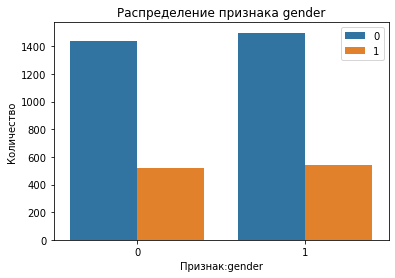

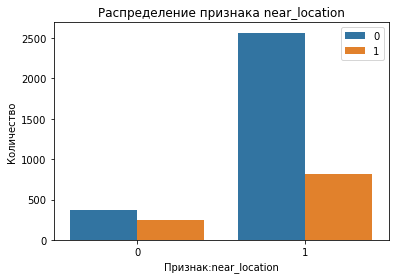

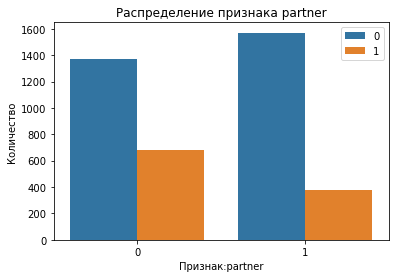

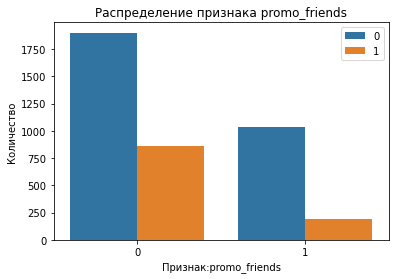

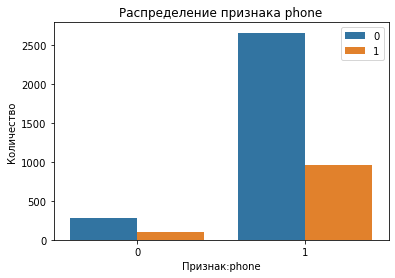

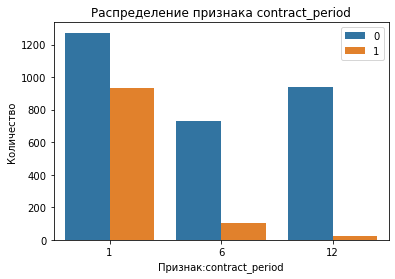

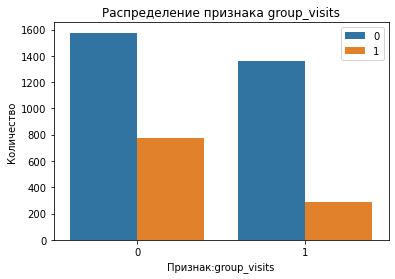

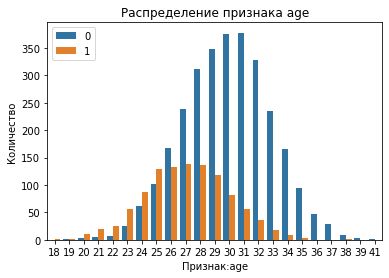

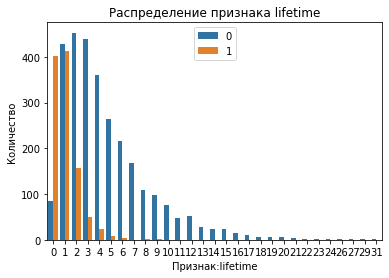

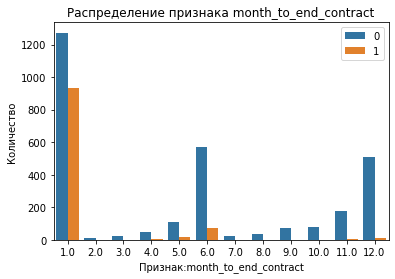

In [8]:
for column in ['gender', 'near_location', 'partner', 'promo_friends','phone', 'contract_period','group_visits', 'age','lifetime', 'month_to_end_contract']:
    sns.countplot(x = data[column], hue='churn', data=data)
    plt.xlabel("Признак:" + column)
    plt.ylabel("Количество")
    plt.title("Распределение признака "+ column)
    plt.legend()
    plt.show()

Построение гистограмм визуально подтвердили выводы из пердыдущего пункта.

<a id='2.4'></a>
### Матрица корреляции

In [9]:
corr_data = data.corr()
corr_data

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
near_location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
avg_additional_charges_total,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
month_to_end_contract,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


Визуализирем нашу матрицу корреляции:

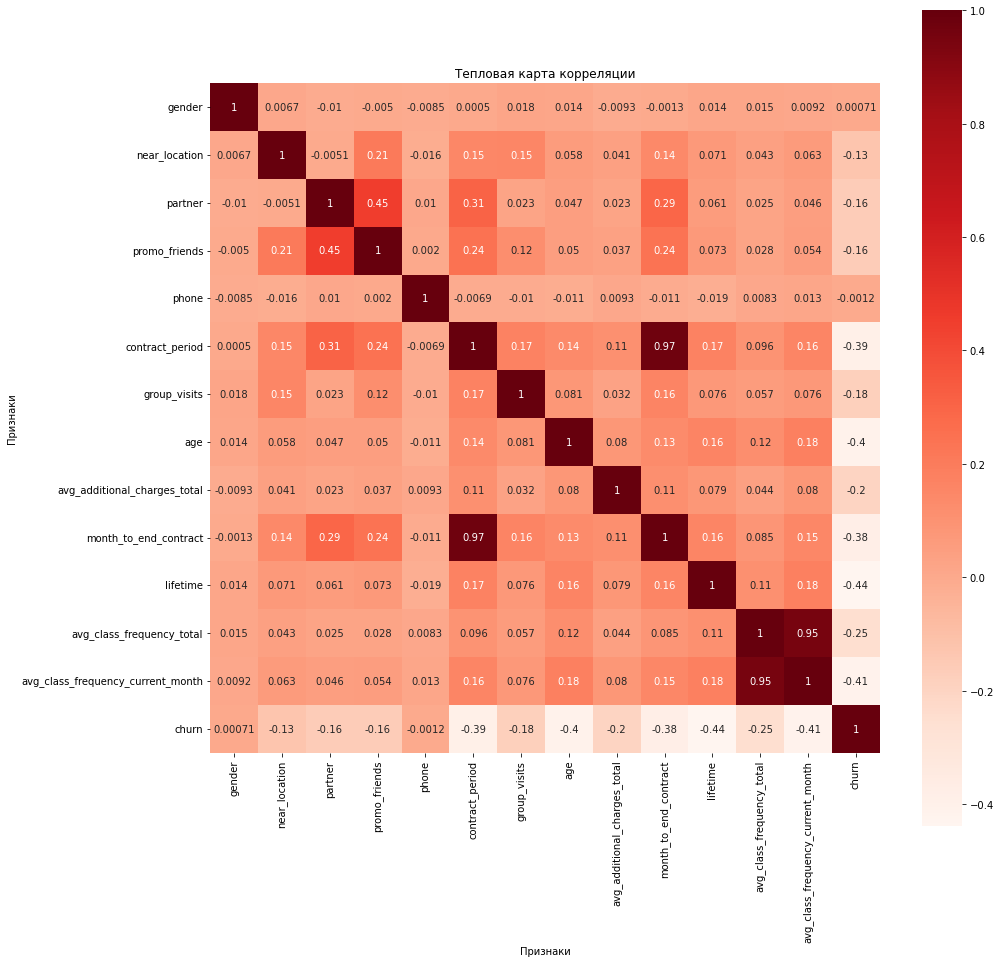

In [10]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr_data, square=True, annot = True, cmap="Reds")
plt.title('Тепловая карта корреляции')
plt.xlabel('Признаки') 
plt.ylabel('Признаки')
plt.show()

Явных признаков, которые значительно влияют на отток клиентов выделить нельзя.

Однако стоит отметить, что сущетсвуют мультиколлинеарных признаки: contract_period и month_to_end_contract; avg_class_frequency_current_month и avg_class_frequency_total.  

<a id='2.4'></a>
### Выводы

Значения по признакам в датасете:
1. Разделение по полу примерно одинаковое - 50 % мужчин и 50 % женщин.
2. Более 80 % людей, занимающиеся в фитнес-клубе - работают или проживают в районе клуба.
3. 50 % посетителей фитнес-клуба пришли от компании-партнера.
4. Пришли по рекомендации друзей всего лишь 30 % посетителей.
5. Телефон оставили 90 % посетителей.
6. Большая часть посетителей оформили "подписку" на 1 месяц и лишь 25 % пользователей оформили на полгода.
7. Групповые занятия в почёте лишь у 40 % посетителей.
8. Средний возраст посетителей фитнес-клуба 29 лет.
9. В среднем зал люди посещают примерно 1-2 раза в неделю, лишь 25% людей посещают зал более 2х раз в неделю.

Распределение клиентов по признакам в оттоке:
1. Женщины и мужчины одинаково уходят в отток.
2. Люди, живущие или работающие рядом с фитнес-клубом, реже перестают заниматься спортом.
3. Посетители клуба, которые пришли по акции "Приведи друга" чаще остаются " в строю".
4. Занимающиеся из компаний-партнеров намного чаще продолжают заниматься.
5. У посетителей, которые попали в отток период действия абомнемента сотсавляет примерно 1 месяц.
6. Ушедшие люди значительно меньше посещали груповые занятия.
7. Средний возвраст посетителй, попавших в отток, на пару лет ниже чем у тех, которые остадлись.
8. Большинство людей, ушедшие из клуба, прозанимались менее месяца.
9. Большинство ушедших людей прозанималось в зале ококло месяца. Оттока среди посетителей, которые прозанимались бодее 5 меясцев практически нет.
10. Люди, имеющие абонемент более 1 месяца ( 6 и 12) практически не подвержены оттоку.

Сильно корреялции среди признаков обнаружено не было ( между признаками и целевой переменной), но были обнаружены мультиколлинеарных признаки: contract_period и month_to_end_contract; avg_class_frequency_current_month и avg_class_frequency_total.

<a id='3'></a>
## Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Обозначим наши признаки и целевую переменную:

In [11]:
X = data.drop('churn', axis = 1)
y = data['churn']

Разобьем наши данные на обучающую и валидационную выборку:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Проведем стандартизацию наших данных:

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<a id='3.1'></a>
### Обучение модели методом логистической регрессии

In [14]:
model_log_reg = LogisticRegression(random_state=0)

model_log_reg.fit(X_train_st, y_train)

model_log_reg_predictions = model_log_reg.predict(X_test_st)
model_log_reg_probabilities = model_log_reg.predict_proba(X_test_st)[:,1]

In [15]:
print('Accuracy  {:.4f}'.format(accuracy_score(y_test, model_log_reg_predictions)), ' - доля правильных ответов')
print('Precision: {:.4f}'.format(precision_score(y_test, model_log_reg_predictions)), ' - точность ')
print('Recall: {:.4f}'.format(recall_score(y_test, model_log_reg_predictions)), ' - полнота')
print('F1: {:.4f}'.format(f1_score(y_test, model_log_reg_predictions)), ' - баланс между метриками Precision and Recall')

Accuracy  0.9225  - доля правильных ответов
Precision: 0.8542  - точность 
Recall: 0.8283  - полнота
F1: 0.8410  - баланс между метриками Precision and Recall


<a id='3.2'></a>
### Обучение модели методом случайный лес

In [16]:
model_random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

model_random_forest.fit(X_train_st, y_train)

model_random_forest_predictions = model_random_forest.predict(X_test_st)
model_random_forest_probabilities = model_random_forest.predict_proba(X_test_st)[:,1]

In [17]:
print('Accuracy  {:.4f}'.format(accuracy_score(y_test, model_random_forest_predictions)), ' - доля правильных ответов')
print('Precision: {:.4f}'.format(precision_score(y_test, model_random_forest_predictions)), ' - точность ')
print('Recall: {:.4f}'.format(recall_score(y_test, model_random_forest_predictions)), ' - полнота')
print('F1: {:.4f}'.format(f1_score(y_test, model_random_forest_predictions)), ' - баланс между метриками Precision and Recall')

Accuracy  0.9150  - доля правильных ответов
Precision: 0.8385  - точность 
Recall: 0.8131  - полнота
F1: 0.8256  - баланс между метриками Precision and Recall


<a id='3.3'></a>
### Вывод

В данном разделе мы обучили две наших модели на выборке, которую разделили на обучающую ( 80 %) и валидационную (20 %).
Обе модели показали себя хорошо, однако модель, обученная методом логистической регрессии, прогнозирует чуть лучше правильных ответов ( 0.9225 против 0.9150). Точность модели логистической регрессии так же немного выше, чем у модели, обученной алгоритмом случайного леса: 0.8542 против 0.8385. Метрика полнота также лучше у первой модели.

Если говорить в целом, то обе модели показали себя хорошо, но модель логистической регрессии сработала лучше. Выбрать стоит именно ее.

<a id='4'></a>
## Кластеризация клиентов

<a id='4.1'></a>
### Стандартизируем данные

In [18]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data.drop(columns = ['churn']))

<a id='4.2'></a>
### Построим матрицу расстояний

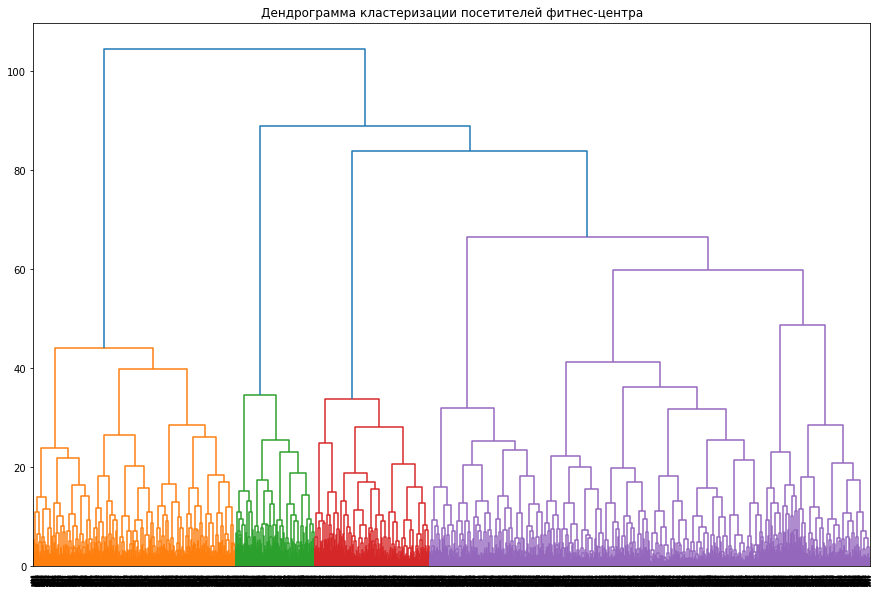

In [19]:
linked = linkage(data_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластеризации посетителей фитнес-центра')
plt.show() 

После построения дендрограммы кластеризации можно сказать, что мы можем выделить 4 кластера.

Но тут стоит учесть, что далее по заданию нам нужно будет 5 кластеров ( в соответствии с условиями "технического задания")

<a id='4.3'></a>
### Обучим модель кластеризации на основании алгоритма K-Means

In [20]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(data_sc)
data['cluster_km'] = labels

Посмотрим что у нас получилось по кластерам:

In [21]:
data.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.50,0.96,0.78,0.57,1.00,10.89,0.54,29.98,160.76,9.95,4.74,1.98,1.97,0.03
1,0.52,0.86,0.47,0.31,0.00,4.79,0.43,29.30,143.96,4.48,3.92,1.85,1.72,0.27
2,0.50,0.00,0.46,0.08,1.00,2.35,0.22,28.48,135.46,2.20,2.81,1.66,1.48,0.44
3,0.49,1.00,0.35,0.24,1.00,1.95,0.34,28.17,131.62,1.86,2.44,1.25,1.01,0.51
4,0.56,0.98,0.36,0.23,1.00,2.67,0.47,30.13,161.66,2.46,4.90,2.85,2.85,0.07


Итак, мы получилис 5 кластеров со следующими группам по оттоку:

0 кластер:
* отток 3 % - самый низкий процент оттока
* живут или работают недалеко от фитнес-центра
* в основном пришли по партнерской программе или по приглашению друга
* всегда оставляют телефон
* часто посещают групповые ханятия
* оформляют абонемент более чем на 6 месяцеы

1 кластер:
* отток 27 %
* живут или работают недалеко от фитнес-центра
* практически 50% пришло по партнерской программе
* в основном оформляют абонемент более чем на 1 месяц
* не оставляют телефоны

2 кластер:
* отток один из самых больших - 44 %
* живут или работают далеко от фитнес центра 
* почти 50 % пришли по партнерской программе
* не любят посещать групповые занятия
* в клуье состоят как правило менее 3х меясцев

3 кластер:
* самый большой отток - 51 %
* живут или работают возле фитнес-центра ( скорее всего забегали попробовать пробное занятие и убежали)
* частично приходили по партнерской программе или по акции "приведи друга"
* покупали абонемент на короткий срок

4 кластер:
* отток один из самых маленьких - 7 %
* живут или работают рядом с фитнес-центром.
* почти 50% посещают груповые занятия
* более 4 меясцев являются посетителями ( самый высокий показатель)
* средний срок абонемента от 1-6 месяцев

<a id='4.4'></a>
### Построим распределения признаков для кластеров

Визуализируем распределение признаков для кластеров с помощью гистограмм:

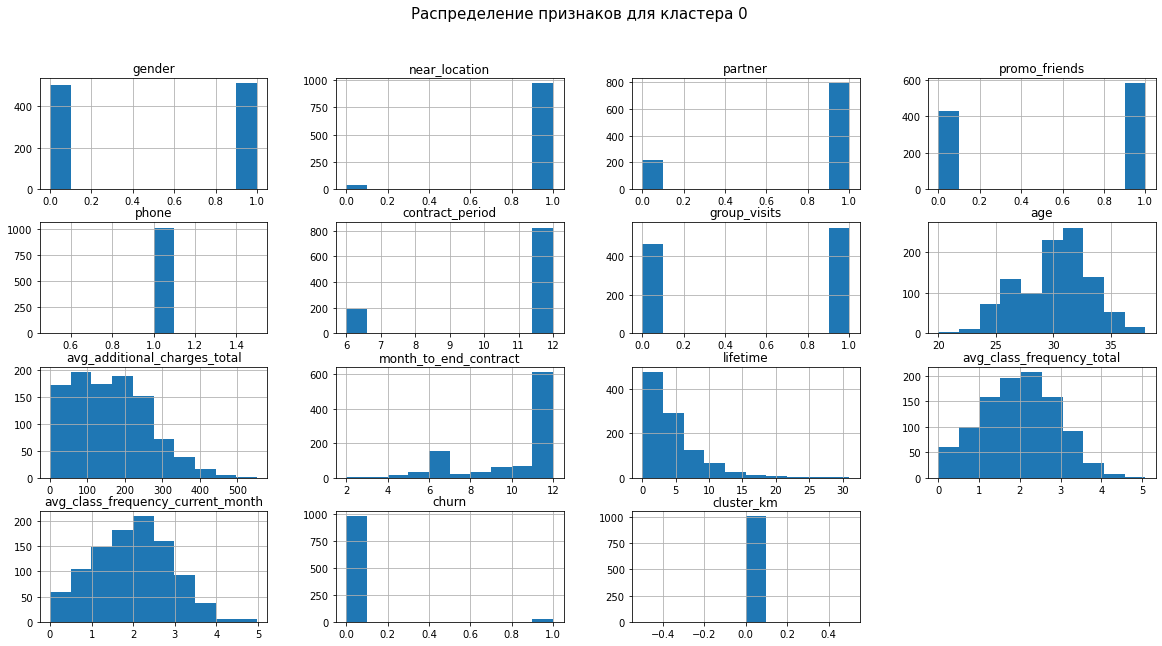

In [22]:
data[data['cluster_km']==0].hist(figsize=(20,10))
plt.suptitle('Распределение признаков для кластера 0', fontsize = 15)
plt.show()

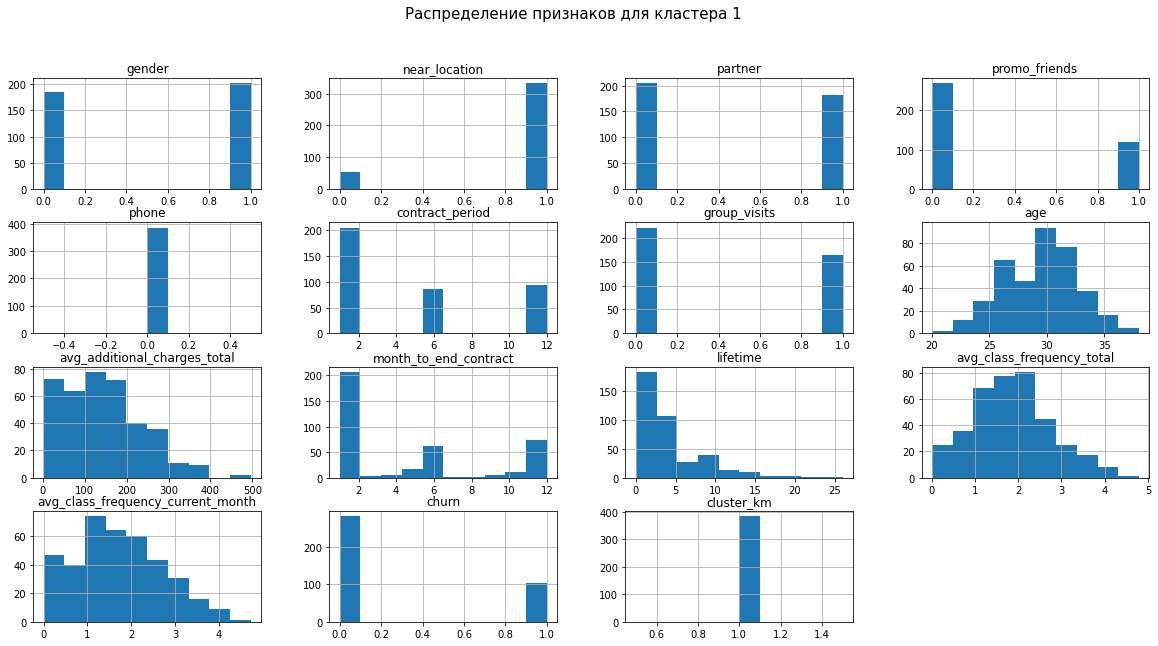

In [23]:
data[data['cluster_km']==1].hist(figsize=(20,10))
plt.suptitle('Распределение признаков для кластера 1', fontsize = 15)
plt.show()

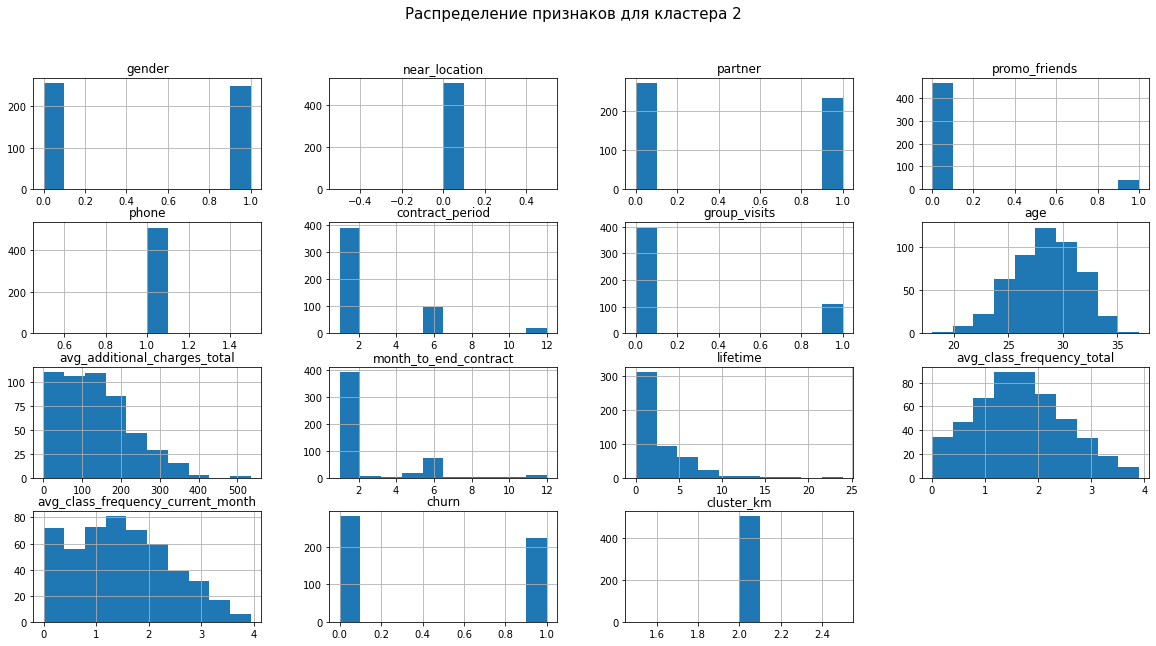

In [24]:
data[data['cluster_km']==2].hist(figsize=(20,10))
plt.suptitle('Распределение признаков для кластера 2', fontsize = 15)
plt.show()

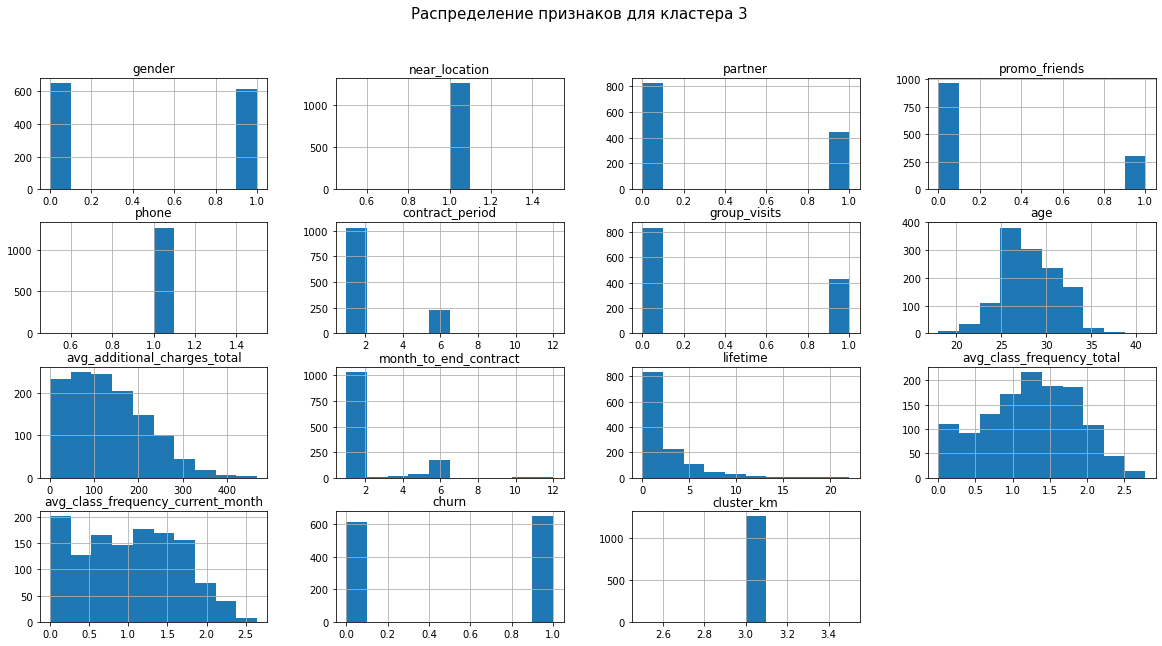

In [25]:
data[data['cluster_km']==3].hist(figsize=(20,10))
plt.suptitle('Распределение признаков для кластера 3', fontsize = 15)
plt.show()

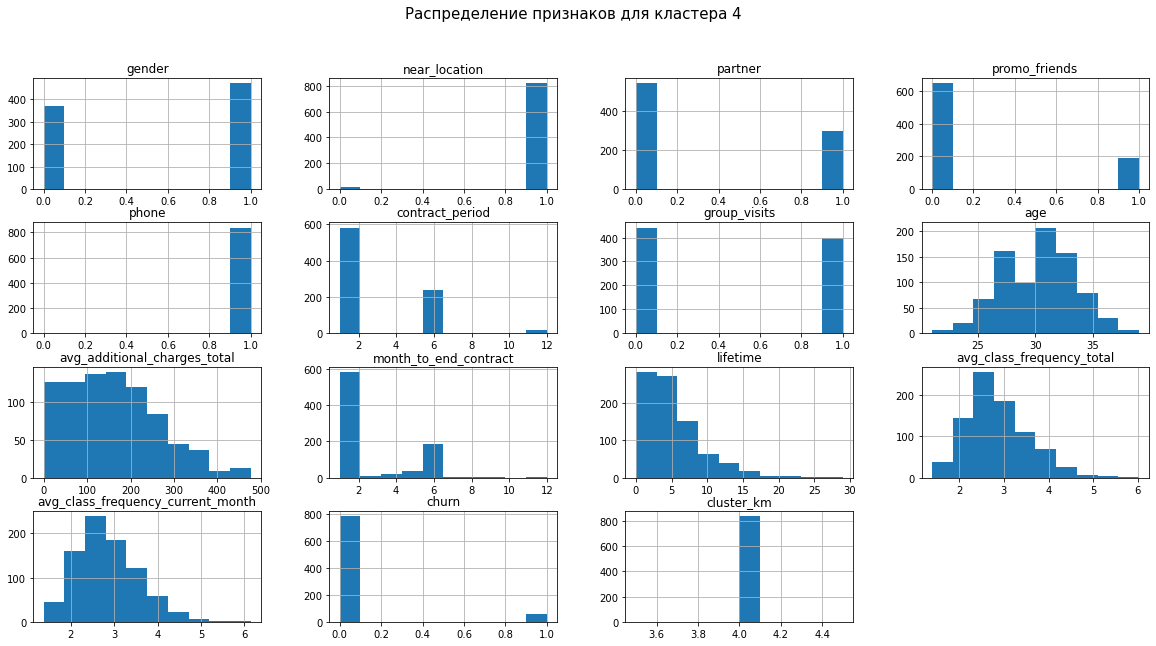

In [26]:
data[data['cluster_km']==4].hist(figsize=(20,10))
plt.suptitle('Распределение признаков для кластера 4', fontsize = 15)
plt.show()

 Не совсем удобно сравнивать по кластерам в разных гистограммах, построим все кластеры по признакам на одной гистограмме:

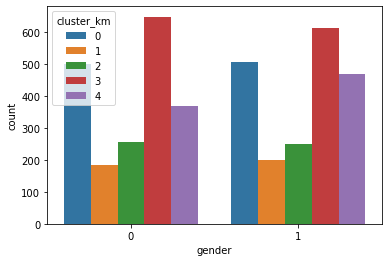

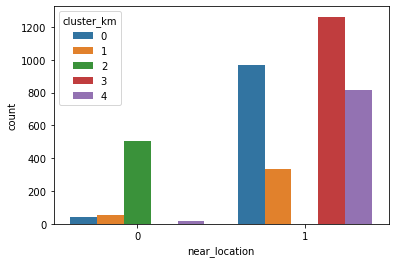

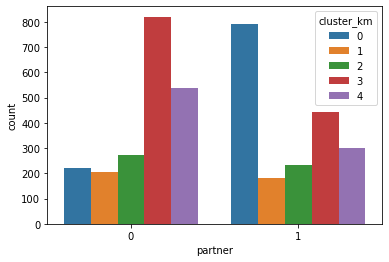

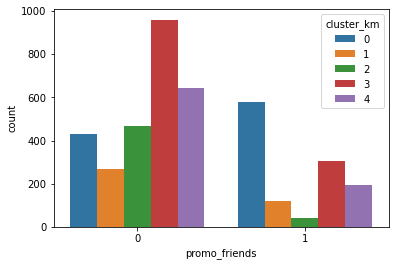

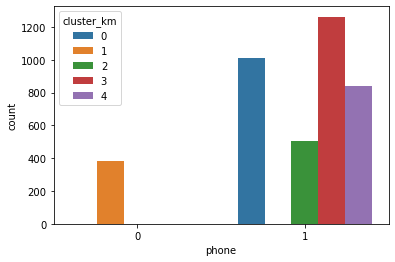

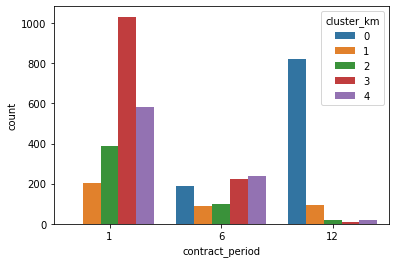

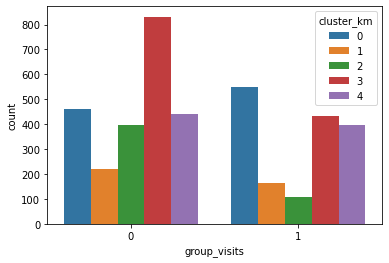

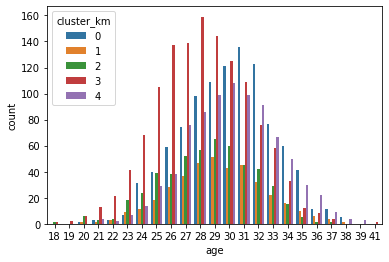

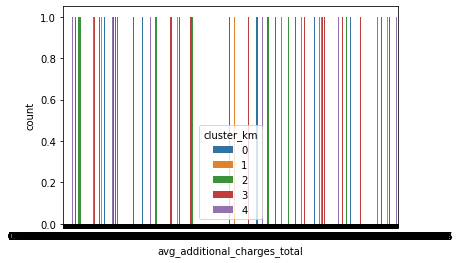

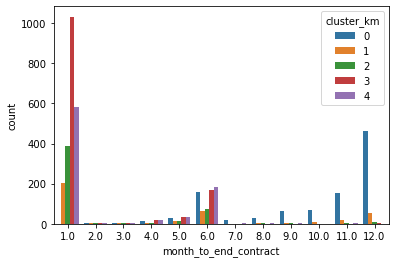

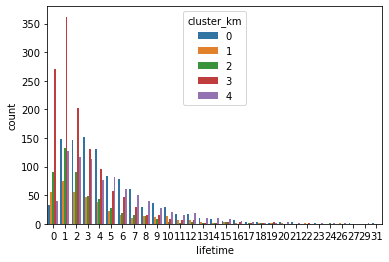

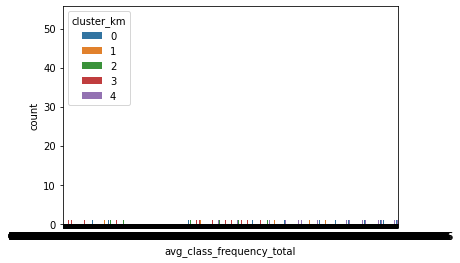

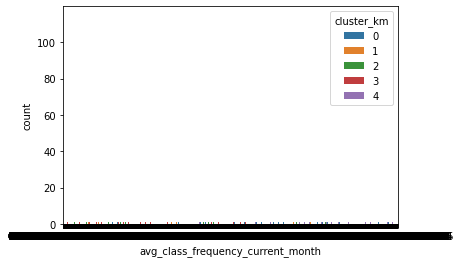

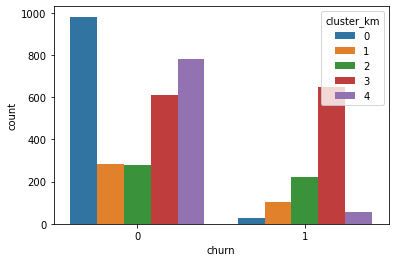

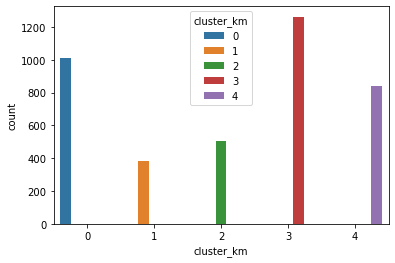

In [27]:
for column in data:
    sns.countplot(x = data[column], hue='cluster_km', data=data)
    plt.show()

Основные моменты по гистаграммам остались такие же как и в прошлом разделе. 

Мне например легче все-таки смотреть и анализироать цифры, чем графики.напомню основные моменты:

0 кластер:
* отток 3 % - самый низкий процент оттока
* живут или работают недалеко от фитнес-центра
* в основном пришли по партнерской программе или по приглашению друга
* всегда оставляют телефон
* часто посещают групповые ханятия
* оформляют абонемент более чем на 6 месяцеы

1 кластер:
* отток 27 %
* живут или работают недалеко от фитнес-центра
* практически 50% пришло по партнерской программе
* в основном оформляют абонемент более чем на 1 месяц
* не оставляют телефоны

2 кластер:
* отток один из самых больших - 44 %
* живут или работают далеко от фитнес центра
* почти 50 % пришли по партнерской программе
* не любят посещать групповые занятия
* в клуье состоят как правило менее 3х меясцев

3 кластер:
* самый большой отток - 51 %
* живут или работают возле фитнес-центра ( скорее всего забегали попробовать пробное занятие и убежали)
* частично приходили по партнерской программе или по акции "приведи друга"
* покупали абонемент на короткий срок

4 кластер:
* отток один из самых маленьких - 7 %
* живут или работают рядом с фитнес-центром.
* почти 50% посещают груповые занятия
* более 4 меясцев являются посетителями ( самый высокий показатель)
* средний срок абонемента от 1-6 месяцев

У нас получилось, что кластер 0 и 4 самые "хорошие", обладают наименьшим оттоком клиентов. В кластерах 2 и 3 самые уходящие клиенты фитнес-центра.

<a id='5'></a>
## Общий вывод

Изучив клиентов финтнес-центра и помсотрев на их кластеризацию с учетом оттока, можно предложить следующее:
1. Настроить рекламу ( или продолжить ее поддерживать) в районе нахождения фитнес-центра - клиенты из близлежащих районов остаются значительно лучше в числе посетителей фитнес-цнтра.
2. Продолжать развивать партнерскую программу и акции "Пригласи друга" - пусть эти моменты влияют хорошо только на 2 кластера наших клиентов, но эффект я думаю от таких кампаний будет отличный.
3. Сделать акцент в маркетинговой кампании на людей позраста от 29-30 лет, так как эти клиенты менее подвержены оттоку, чем посетители 26-27 лет.
4. Активно предлагать групповые заняти - они нравятся постоянным клиентам и с удовольствием на них ходят.
5. Сделать какую-нибудь акцию на абонементы на 6-12 месяцев ( скидка или + 1 меясц в подарок, например). Как показало исследования, люди приобретающие абонементы на 6-12 меясцев меньше подвержены оттоку ( может быть это конечно во всем виновата "жаба", но нам же нужно удержать клинта, пусть и таким способом).